**<font color = 'blue' size = 38>DATA PREPARATION</font>**

# <font color='Orange'>Handling missing values</font>

## <font color='Orange'>Titanic Dataset for Non Time Series problem</font>
https://www.kaggle.com/c/titanic/data

In [2]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-04/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-04/test.csv')

In [3]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <font color='Orange'>Examining the Target column</font>
For each passenger in the test set, we need to create a model that predicts whether or not the passengers survived the sinking of the Titanic. Hence Survived is that target column in the dataset. Let's examine the Distribution of the target column

In [5]:
ds = train['Survived'].value_counts()

Visualization of *'Survived'* column


*   1: Survived
*   0: Did not Survive



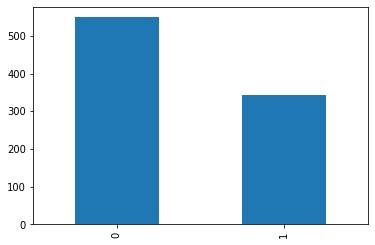

In [6]:
ds.plot.bar()

### <font color = 'Orange'>Detecting Missing values</font>

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

The missing values in the Dataset for training.

In [7]:
missing_values_train = train.isnull().sum()
percentage_train = 100 * train.isnull().sum() / len(train)
missing_values_table_train = pd.concat([missing_values_train, percentage_train], axis=1)
missing_values_table_train.columns = ['Num. of missing values','% of missing values']
missing_values_table_train

,Num. of missing values,% of missing values
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


The missing values in the Dataset for testing.

In [8]:
missing_values_test = test.isnull().sum()
percentage_test = 100 * test.isnull().sum() / len(test)
missing_values_table_test = pd.concat([missing_values_test, percentage_test], axis=1)
missing_values_table_test.columns = ['Num. of missing values','% of missing values']
missing_values_table_test

,Num. of missing values,% of missing values
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


### <font color = 'Orange'>Detecting missing data visually using Missingno library</font>

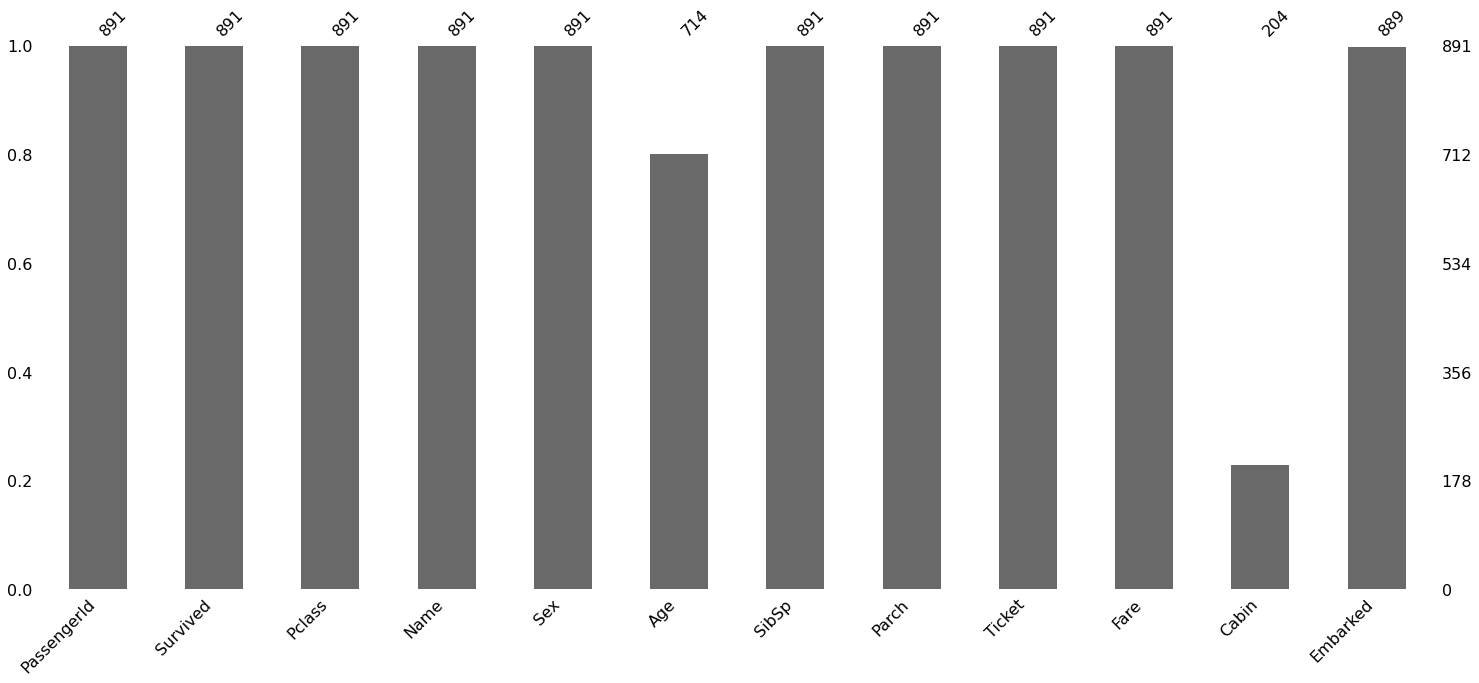

In [9]:
import missingno as msno
msno.bar(train)

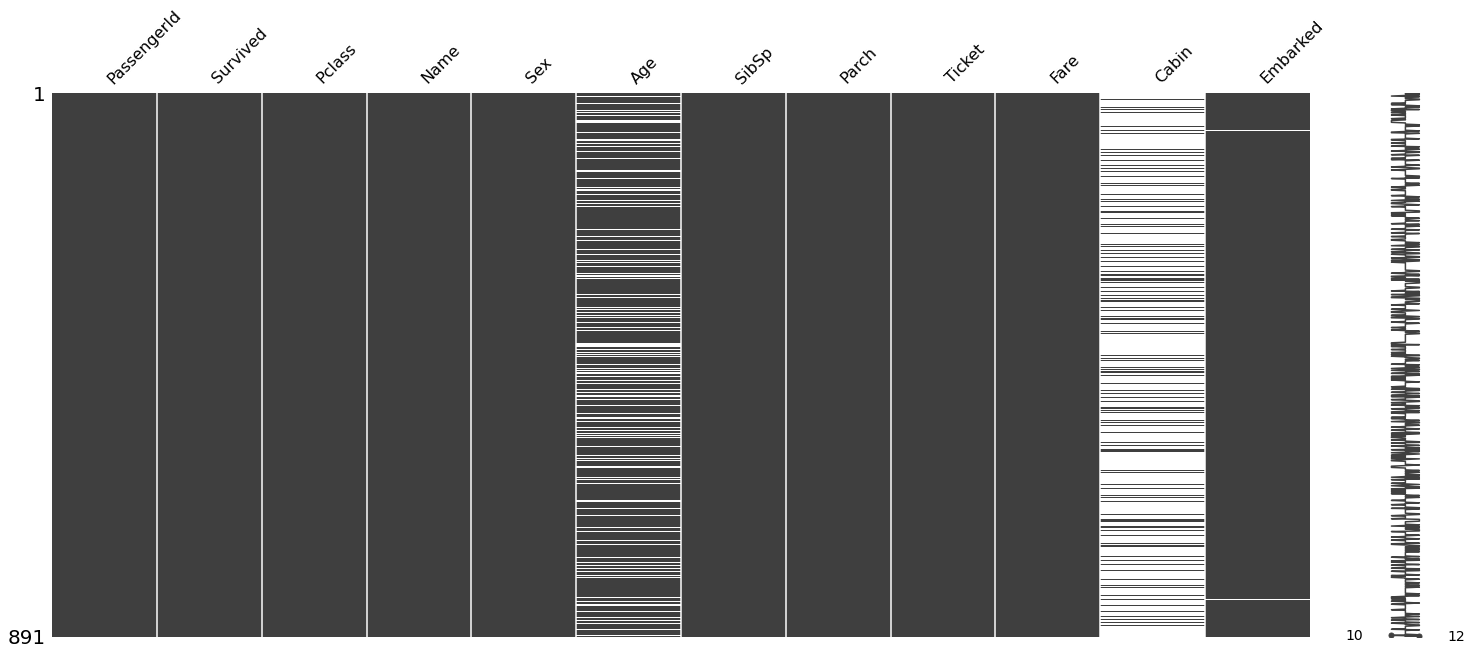

In [10]:
msno.matrix(train)

### <font color='Orange'>Reasons for Missing Values</font>

The missingno package also let's us sort the graph by a particluar column. Let's sort the values by Age and Cabin column to see if there is a pattern in the missing values



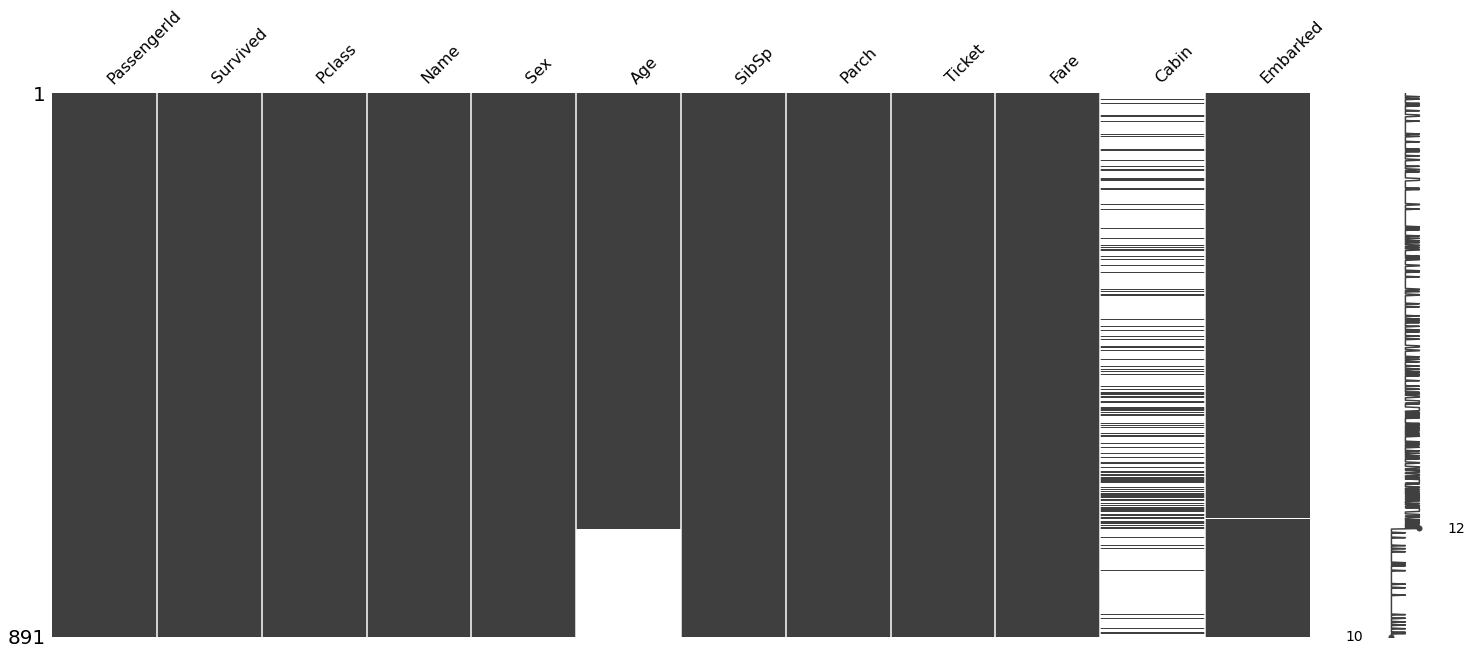

In [11]:
#sorted by Age
msno.matrix(train.sort_values('Age'))

It is clear that here is no relation between the missingness in Age and Cabin column.To cement this conclusion further we can also draw a Heatmap among the different variables in the dataset.

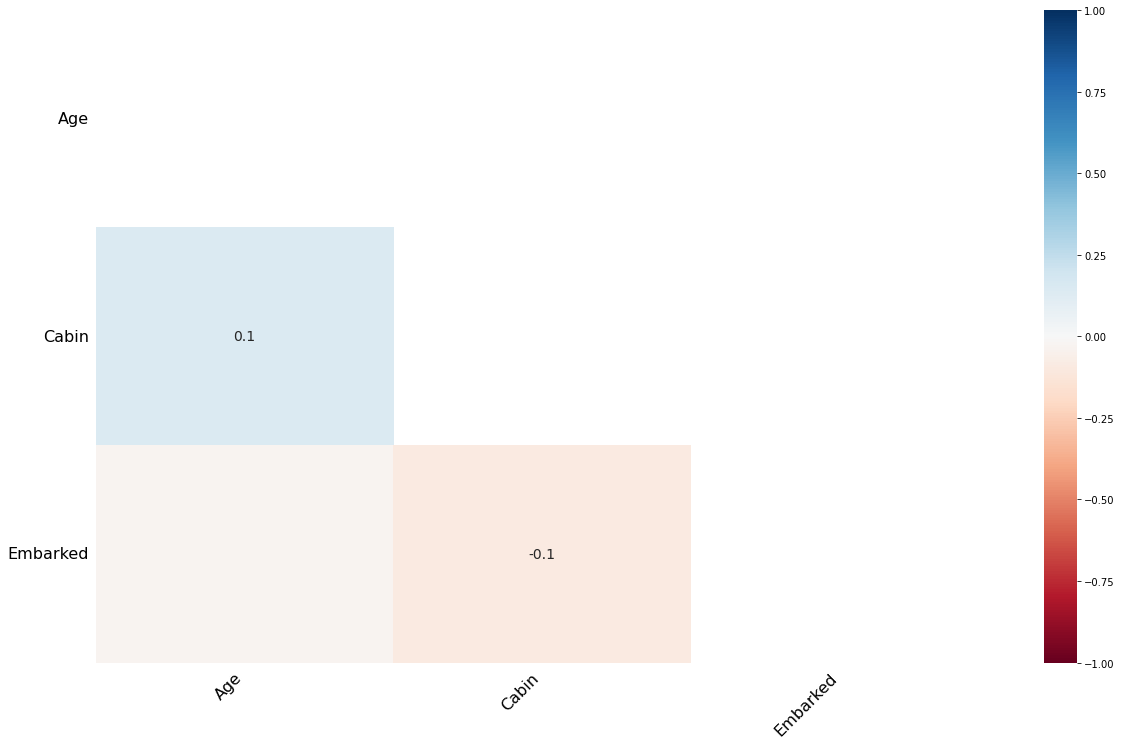

In [12]:
msno.heatmap(train)

The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.


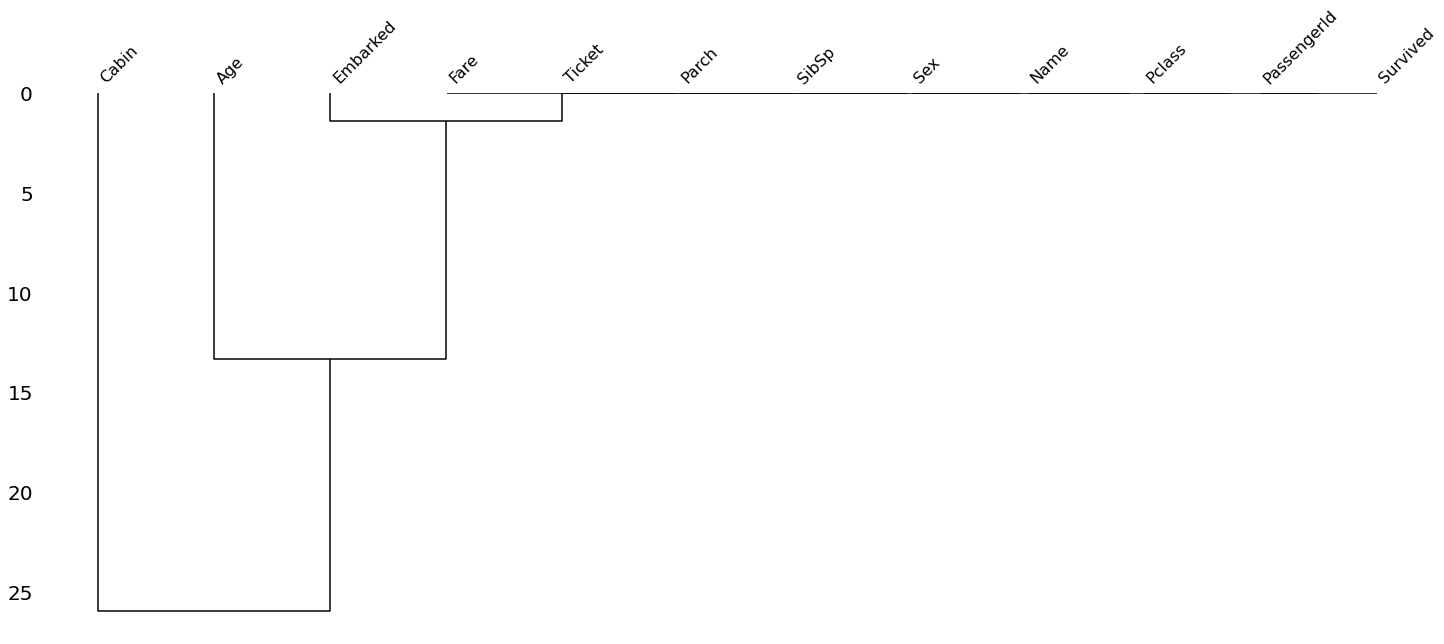

In [13]:
msno.dendrogram(train)


### <font color='Orange'>Treating Missing values</font>


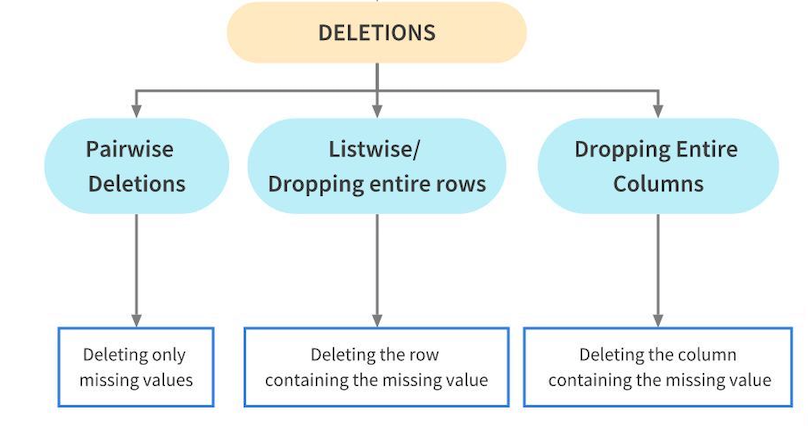


**Parwise Deletion** is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [14]:
train_1 = train.copy()
train_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

**Listwise deletion**, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [15]:
#Drop rows which contains any NaN or missing value for Age column
train_1.dropna(subset=['Age'],how='any',inplace=True)
train_1['Age'].isnull().sum()

0

The Listwise deletion problem is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

**Dropping complete columns**
If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

### <font color='Orange'>Imputations (General) Techniques for non Time Series Problems</font>

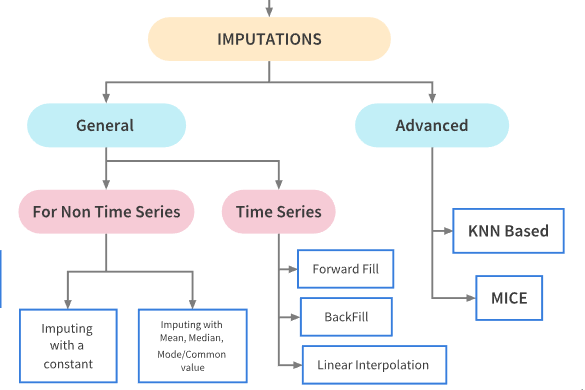

Basic Imputation Techniques:

*   Imputating with a constant value

*   Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located

For this we shall use the The SimpleImputer class from sklearn.

In [16]:
from sklearn.impute import SimpleImputer
train_const = train.copy()
main_imputer = SimpleImputer(strategy = 'constant',  fill_value = 0)
train_const.iloc[:,:] = main_imputer.fit_transform(train_const)
train_const.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
train_const = train.copy()
main_imputer = SimpleImputer(strategy = 'most_frequent')
train_const.iloc[:,:] = main_imputer.fit_transform(train_const)
train_const.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### <font color = 'Orange'>Advanced Imputation Techniques</font>

#### <font color = 'Orange'>K-Nearest Neighbor</font>


In [18]:
train_knn = train.copy(deep=True)

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_knn['Age']=scaler.fit_transform(train_knn['Age'].to_numpy().reshape(-1, 1) )

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [20]:
train_knn['Age'].isnull().sum()

0

In [21]:
train_knn['Age'].head()

0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
Name: Age, dtype: float64

#### <font color='Orange'>Multivariate feature imputation - Multivariate imputation by chained equations (MICE)</font>

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

In [23]:
train_mice['Age'].isnull().sum()

0

## <font color = 'Orange'>Air Quality Data in India (2015 - 2020) for Time Series problem</font>
https://www.kaggle.com/rohanrao/air-quality-data-in-india

In [25]:
city_day = pd.read_csv('/content/drive/MyDrive/Data Science/Vezbi/Auditoriski vezbi/DS-AV-04/city_day.csv')
city_day1=city_day.copy(deep=True)
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


 As id evident, city_day dataframe consists of daily pollution level data of some of the prominent cities in India.

In [26]:
missing_values_city_day = city_day.isnull().sum()
percentage_city_day = 100 * city_day.isnull().sum() / len(city_day)
missing_values_table_city_day = pd.concat([missing_values_city_day, percentage_city_day], axis=1)
missing_values_table_city_day.columns = ['Num. of missing values','% of missing values']
missing_values_table_city_day

,Num. of missing values,% of missing values
City,0,0.000000
Date,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692


There are a lot of missing values and some of the columns like **Xylene** and **PM10** have more than 50% of the values missing. Let's now see how we can impute these missing values.

In [28]:
city_day['Xylene'][60:70]

60    0.22
61    2.25
62    1.55
63    4.13
64     NaN
65    0.39
66    0.63
67    1.35
68    1.74
69    2.78
Name: Xylene, dtype: float64

### <font color = 'Orange'>Imputing using ffill
</font>

**ffill**: propagate last valid observation forward to next valid 

In [29]:
city_day.fillna(method='ffill',inplace=True)
city_day['Xylene'][60:70]

60    0.22
61    2.25
62    1.55
63    4.13
64    4.13
65    0.39
66    0.63
67    1.35
68    1.74
69    2.78
Name: Xylene, dtype: float64

### <font color='Orange'>Imputation using bfill</font>

**bfill**: use next valid observation to fill gap

In [30]:
city_day['AQI'][20:30]

20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28    209.0
29    328.0
Name: AQI, dtype: float64

In [31]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

20    209.0
21    209.0
22    209.0
23    209.0
24    209.0
25    209.0
26    209.0
27    209.0
28    209.0
29    328.0
Name: AQI, dtype: float64

### <font color='Orange'>Imputation using Linear Interpolation method</font>

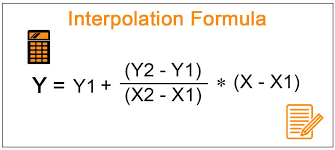

In [32]:
city_day1['Xylene'][60:70]

60    0.22
61    2.25
62    1.55
63    4.13
64     NaN
65    0.39
66    0.63
67    1.35
68    1.74
69    2.78
Name: Xylene, dtype: float64

In [34]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][60:70]

60    0.22
61    2.25
62    1.55
63    4.13
64    2.26
65    0.39
66    0.63
67    1.35
68    1.74
69    2.78
Name: Xylene, dtype: float64

# <font color='Orange'>Encoding Categorical Data</font>

## <font color = 'Orange'>Encoding labels</font>

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [37]:
classes = list(set(train['Embarked']))
classes


[nan, 'C', 'Q', 'S']

In [38]:
dict = {}
for i in range(0,len(classes)):
    dict[classes[i]] = i
dict

{'C': 1, 'Q': 2, 'S': 3, nan: 0}

In [39]:
train['Embarked'] = [dict[train['Embarked'][i]]for i in range(0,len(train['Embarked']))]

In [40]:
train['Embarked']

0      3
1      1
2      3
3      3
4      3
      ..
886    3
887    3
888    3
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3


In [42]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
train['Sex']= le.fit_transform(train['Sex']) 

In [43]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1


## <font color='Orange'>One-Hot encoding</font>

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(train[['Embarked']]).toarray())
# merge with the train data on key values
train = train.join(enc_df)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,3,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,3,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,3,0.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,3,0.0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,3,0.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,0.0,1.0,0.0,0.0


# <font color='Orange'>Text data vectorization</font>

## <font color='Orange'>Using CountVectorizer</font>

In [45]:

from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
names = train['Name']
X = vectorizer.fit_transform(names)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,aaron,abbing,abbott,abelson,abraham,achem,achille,achilles,ada,adahl,adams,adelaide,adele,adelia,adola,adolf,adolfina,adolphe,adrian,agatha,agda,agnes,ahlin,ahmed,aijo,aime,aina,aks,albert,albimona,albin,albina,alden,alexander,alexandra,alexanteri,alexenia,alfons,alfonzo,alfred,...,white,wick,widegren,widener,wiklund,wilhelm,wilhelmina,wilhelms,wilkinson,willey,william,williams,willingham,wills,wilson,windelov,winfield,winnie,wiseman,wizosky,wonnacott,wood,woolner,worth,wright,wyckoff,yarred,yasbeck,yoto,young,youseff,yousif,youssef,yousseff,yrois,zabour,zebley,zenni,zillah,zimmerman
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
